<a href="https://colab.research.google.com/github/gabrielfernandorey/Challenge/blob/main/projects/ML01/flight_delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Latam




## Clonar repositorio de Github

fatal: destination path 'Challenge' already exists and is not an empty directory.


## Importamos datos



In [ ]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [ ]:
# Load dataset
filename = '/content/Challenge/LATAM/dataset_SCL.csv'
df_raw = pd.read_csv(filename)
df_raw.head(5)

<ipython-input-3-51d85d409063>:3: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(filename)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


Diccionario de datos

- Fecha-I : Fecha y hora programada del vuelo.
- Vlo-I : Número de vuelo programado.
- Ori-I : Código de ciudad de origen programado.
- Des-I : Código de ciudad de destino programado.
- Emp-I : Código aerolínea de vuelo programado.
- Fecha-O : Fecha y hora de operación del vuelo.
- Vlo-O : Número de vuelo de operación del vuelo.
- Ori-O : Código de ciudad de origen de operación
- Des-O : Código de ciudad de destino de operación.
- Emp-O : Código aerolínea de vuelo operado.
- DIA : Día del mes de operación del vuelo.
- MES : Número de mes de operación del vuelo.
- AÑO : Año de operación del vuelo.
- DIANOM : Día de la semana de operación del vuelo.
- TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.
- OPERA : Nombre de aerolínea que opera.
- SIGLAORI : Nombre ciudad origen.
- SIGLADES : Nombre ciudad destino.

## EDA

### ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [ ]:
# Tipo de datos
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [ ]:
# Valores nulos
df_raw.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [ ]:
# Registro con valor nulo en Vlo-O
df_raw[df_raw['Vlo-O'].isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [ ]:
# Validar si hay diferencias de valores entre Vlo-I y Vlo-O
diferencias = df_raw[df_raw['Vlo-I'] != df_raw['Vlo-O']]
diferencias.count()

Fecha-I      1850
Vlo-I        1850
Ori-I        1850
Des-I        1850
Emp-I        1850
Fecha-O      1850
Vlo-O        1849
Ori-O        1850
Des-O        1850
Emp-O        1850
DIA          1850
MES          1850
AÑO          1850
DIANOM       1850
TIPOVUELO    1850
OPERA        1850
SIGLAORI     1850
SIGLADES     1850
dtype: int64

Existen 1850 filas que difieren en valor entre las columnas estudiadas. Esto representa casi un 3% del total de los datos y no será descartado.

El valor nulo detectado, se resolverá mediante la imputacion del mismo valor que Vlo-I, por ser un único valor no tendrá impacto.

In [ ]:
df_raw.at[6068,'Vlo-O'] = '200'
df_raw.loc[6068]

Fecha-I       2017-01-19 11:00:00
Vlo-I                         200
Ori-I                        SCEL
Des-I                        SPJC
Emp-I                         LAW
Fecha-O       2017-01-19 11:03:00
Vlo-O                         200
Ori-O                        SCEL
Des-O                        SPJC
Emp-O                         56R
DIA                            19
MES                             1
AÑO                          2017
DIANOM                     Jueves
TIPOVUELO                       I
OPERA        Latin American Wings
SIGLAORI                 Santiago
SIGLADES                     Lima
Name: 6068, dtype: object

In [ ]:
# Buscamos otras diferencias entre Ori-I y Ori-O
diferencias = df_raw[df_raw['Ori-I'] != df_raw['Ori-O']]
diferencias.count()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        0
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

Podemos prescindir de la columna Ori-O ya que no presenta diferencias entre ambas columnas

In [ ]:
df_raw = df_raw.drop("Ori-O", axis=1)

In [ ]:
# Buscamos otras diferencias entre Ori-I y Ori-O
diferencias = df_raw[df_raw['Des-I'] != df_raw['Des-O']]
diferencias.count()

Fecha-I      28
Vlo-I        28
Ori-I        28
Des-I        28
Emp-I        28
Fecha-O      28
Vlo-O        28
Des-O        28
Emp-O        28
DIA          28
MES          28
AÑO          28
DIANOM       28
TIPOVUELO    28
OPERA        28
SIGLAORI     28
SIGLADES     28
dtype: int64

In [ ]:
# Buscamos otras diferencias entre Emp-I y Emp-O
diferencias = df_raw[df_raw['Emp-I'] != df_raw['Emp-O']]
diferencias.count()

Fecha-I      18669
Vlo-I        18669
Ori-I        18669
Des-I        18669
Emp-I        18669
Fecha-O      18669
Vlo-O        18669
Des-O        18669
Emp-O        18669
DIA          18669
MES          18669
AÑO          18669
DIANOM       18669
TIPOVUELO    18669
OPERA        18669
SIGLAORI     18669
SIGLADES     18669
dtype: int64

Encontramos 18669 registros en donde difieren Emp-I y Emp-O

In [ ]:
# Año/s de ocurrencia de vuelos
df_raw.AÑO.value_counts()


2017    68204
2018        2
Name: AÑO, dtype: int64

In [ ]:
print('Fecha mínima dataset:', min(df_raw['Fecha-I']))
print('Fecha máxima dataset:', max(df_raw['Fecha-I']))

Fecha mínima dataset: 2017-01-01 00:15:00
Fecha máxima dataset: 2017-12-31 23:55:00


Los datos van desde enero a diciembre de 2017, la columna AÑO por excepcion presenta 2 casos donde es 2018 correspondiente al 31-12-2017

In [ ]:
df_raw.sort_values("Fecha-I", ascending=True).tail()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66797,2017-12-31 23:30:00,532,SCEL,KJFK,LAN,2017-12-31 23:32:00,532.0,KJFK,LAN,31,12,2017,Domingo,I,Grupo LATAM,Santiago,Nueva York
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico
62026,2017-12-31 23:45:00,11,SCEL,MMMX,AMX,2017-12-31 23:42:00,11,MMMX,AMX,31,12,2017,Domingo,I,Aeromexico,Santiago,Ciudad de Mexico
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
61862,2017-12-31 23:55:00,226,SCEL,KMIA,AAL,2017-12-31 23:53:00,226,KMIA,AAL,31,12,2017,Domingo,I,American Airlines,Santiago,Miami


In [ ]:
# Validar si ORI-I es solo SCEL
df_raw[(df_raw['Ori-I'] == 'SCEL')]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


Todos los registros corresponden a despegues de SCEL (No hay arribos a SCEL)

### Generar las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv

In [ ]:
# Agregamos columnas nuevas en un nuevo df
df_transform = df_raw.copy()

In [ ]:
df_transform['temporada_alta'] = 0
df_transform['dif_min'] = None
df_transform['atraso_15'] = 0
df_transform['periodo_dia'] = None

In [ ]:
# temporada alta = 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
def check_condition(date):
    if pd.to_datetime('2016-12-15') <= pd.to_datetime(date) <= pd.to_datetime('2017-03-03') or \
        pd.to_datetime('2016-12-15') <= pd.to_datetime(date) <= pd.to_datetime('2017-03-03') or \
        pd.to_datetime('2016-12-15') <= pd.to_datetime(date) <= pd.to_datetime('2017-03-03'):
        return 1
    else:
        return 0

df_transform['temporada_alta'] = df_transform['Fecha-I'].apply(check_condition)


In [ ]:
# diferencia en minutos entre Fecha-O y Fecha-I
def check_condition(row):
    if pd.to_datetime(row['Fecha-O']) >= pd.to_datetime(row['Fecha-I']):
      diferencia = (pd.to_datetime(row['Fecha-O']) - pd.to_datetime(row['Fecha-I'])).total_seconds() / 60
    else:
      diferencia = pd.to_datetime(0).minute
    return diferencia

df_transform['dif_min'] = df_transform.apply(check_condition, axis=1)


In [ ]:
# 1 si dif_min > 15, 0 si no
def check_condition(dif_min):
    if dif_min > 15:
        return 1
    else:
        return 0

df_transform['atraso_15'] = df_transform['dif_min'].apply(check_condition)

In [ ]:
# mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I
def check_condition(hms):
  if pd.to_datetime('05:00').time() <= pd.to_datetime(hms).time() <= pd.to_datetime('11:59').time():
    return 'mañana'
  elif pd.to_datetime('12:00').time() <= pd.to_datetime(hms).time() <= pd.to_datetime('18:59').time():
    return 'tarde'
  else:
    return 'noche'

df_transform['periodo_dia'] = df_transform['Fecha-I'].apply(check_condition)

In [ ]:
df_transform

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,0.0,0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,0,46.0,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,0,16.0,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,0,40.0,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,0,13.0,0,tarde


In [ ]:
# Exportacion
compression_opts = dict(method='zip', archive_name='out.csv')
df_raw.to_csv('export.zip', index=False, compression=compression_opts)

### ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?

#### Analisis en funcion del **"tiempo de atraso"**
La tasa de atraso se ha calculado en función del promedio en minutos de atraso para cada variable estudiada.

In [ ]:
# Definir umbral y color
def grafico_tasa(tasa, titulo):
  umbral = 15
  color_umbral = 'red'

  fig, ax = plt.subplots(figsize=(30,5))
  ax.bar(tasa.index, tasa.values, color=[color_umbral if valor >= umbral else 'darkgreen' for valor in tasa.to_list()])
  ax.set_ylabel("Promedio de atraso (Minutos)")
  ax.set_title(f"Tasa de atraso por {titulo} - (en rojo > 15 minutos)")
  ax.set_xticks( tasa.index )
  ax.set_xticklabels(tasa.index, rotation=85, ha='center')
  plt.show;

##### Por destino

In [ ]:
tasa_destino = df_transform.groupby("SIGLADES")["dif_min"].mean().sort_values()
tasa_destino

SIGLADES
Washington            0.000000
Pisco, Peru           2.000000
Curitiba, Bra.        2.000000
Cataratas Iguacu      2.500000
Atlanta               3.343575
                       ...    
Ushuia               24.500000
Sydney               27.134021
Puerto Stanley       50.000000
Quito                52.000000
Cochabamba          113.000000
Name: dif_min, Length: 62, dtype: float64

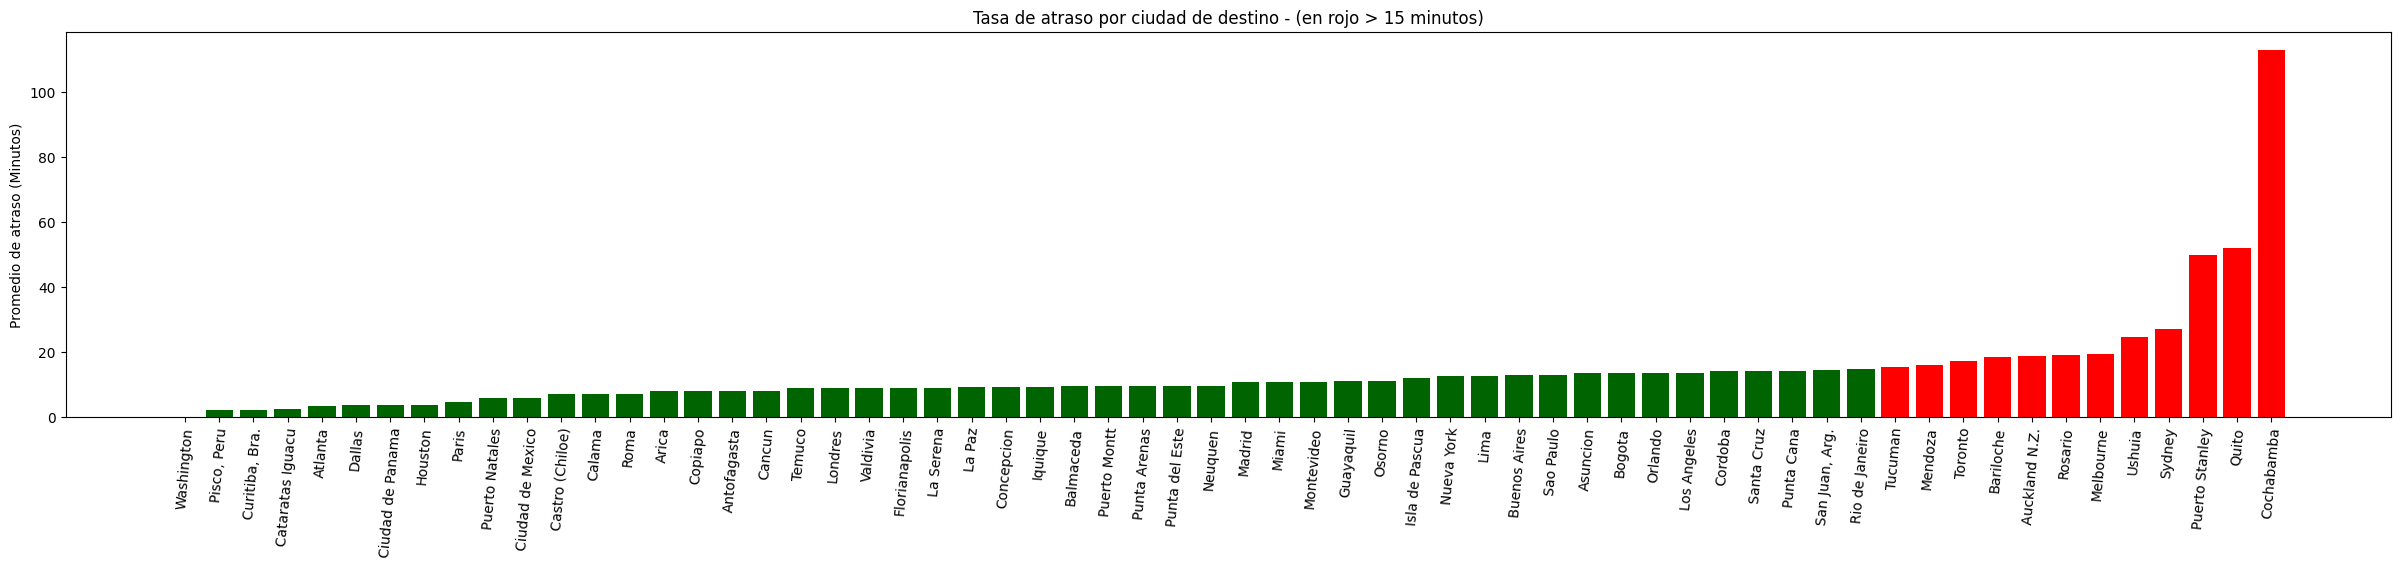

In [ ]:
grafico_tasa(tasa_destino, "ciudad de destino")

In [ ]:
vuelos_por_destino = df_transform.groupby("SIGLADES")["SIGLADES"].count()
vista_destino = pd.merge(tasa_destino, vuelos_por_destino, left_index=True, right_index=True ).sort_values('dif_min', ascending=True)
vista_destino

,dif_min,SIGLADES
SIGLADES,,
Washington,0.000000,1
"Pisco, Peru",2.000000,1
"Curitiba, Bra.",2.000000,3
Cataratas Iguacu,2.500000,2
Atlanta,3.343575,358
...,...,...
Ushuia,24.500000,6
Sydney,27.134021,194
Puerto Stanley,50.000000,1


In [ ]:
# Definir umbral y color
def grafico_tasa2(tasa, titulo):
  umbral = 15
  color_umbral = 'red'

  fig, ax1 = plt.subplots(figsize=(30,5))
  ax2 = ax1.twinx()  # Crear ejes independientes para el segundo gráfico
  ax1.bar(tasa.index, tasa.dif_min.values, color=[color_umbral if valor >= umbral else 'darkgreen' for valor in tasa.dif_min.to_list()])
  ax1.set_ylabel("Promedio de atraso (Minutos)")
  ax1.set_title(f"Tasa de atraso por {titulo} - (en rojo: atraso > 15 minutos | amarillo: vuelos)")
  ax1.set_xticks( tasa.index )
  ax1.set_xticklabels(tasa.index, rotation=85, ha='center')


  ax2.scatter(tasa.index, tasa.iloc[:,1].values, color='orange')
  ax2.set_ylabel("Cantidad de Vuelos")

  plt.show;

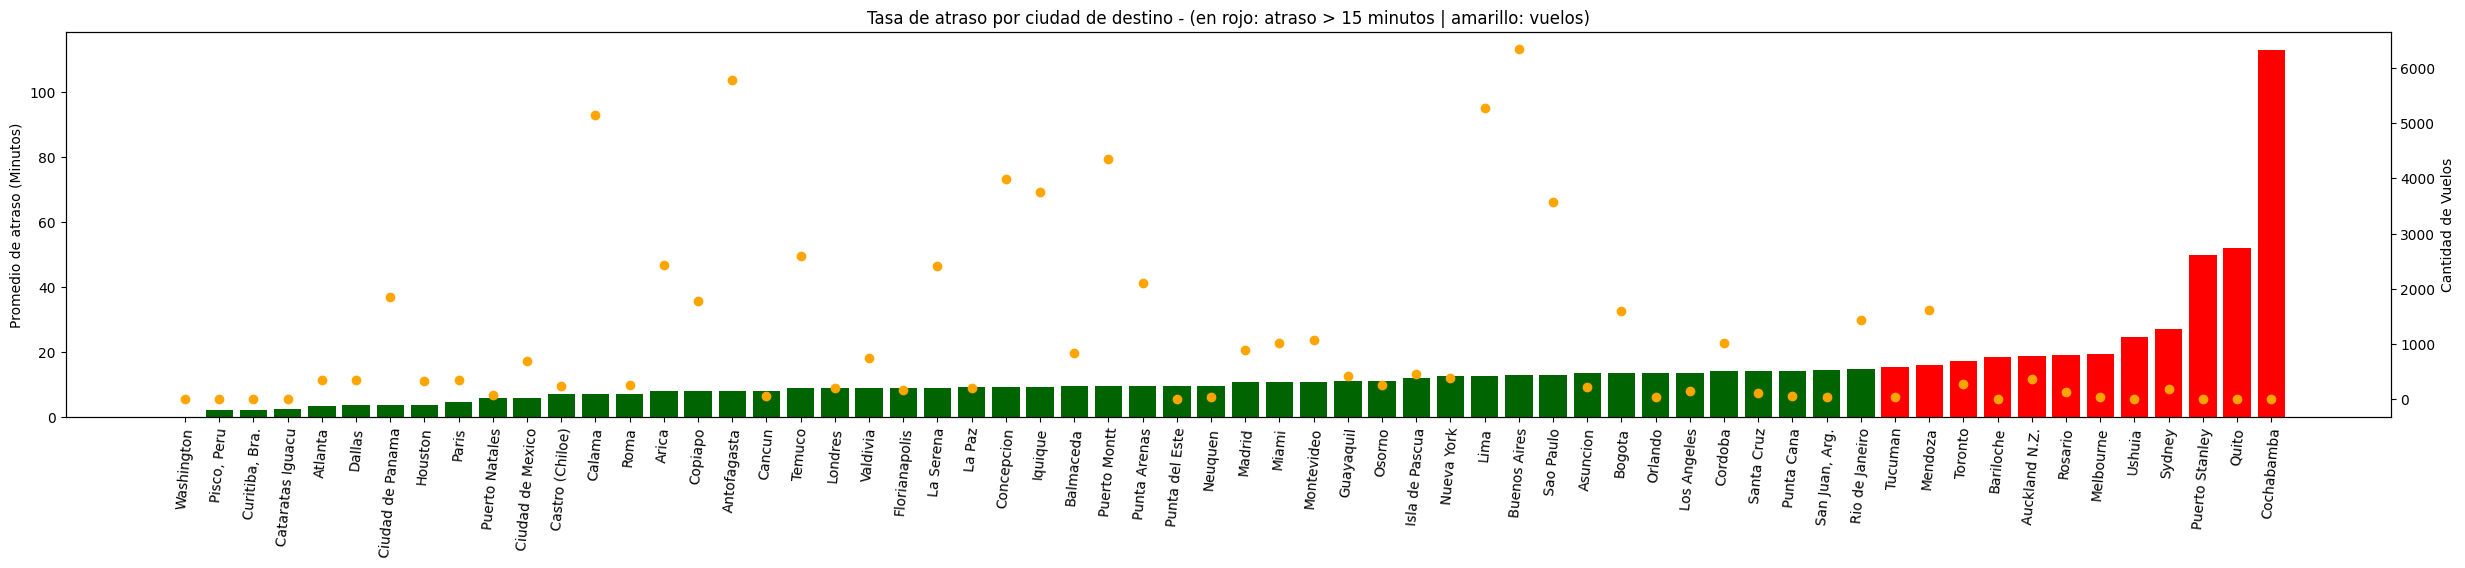

In [ ]:
grafico_tasa2(vista_destino, "ciudad de destino")

##### Por aerolinea

In [ ]:
tasa_aerolinea = df_transform.groupby("OPERA")["dif_min"].mean().sort_values()
tasa_aerolinea

OPERA
Aeromexico                   2.079772
Delta Air                    3.343575
Copa Air                     3.596757
United Airlines              3.713433
Air France                   4.212291
American Airlines            4.235139
K.L.M.                       5.450199
Iberia                       5.977901
Alitalia                     7.181467
Lacsa                        7.597826
Austral                      8.783784
JetSmart SPA                 8.800000
British Airways              8.814634
Sky Airline                  9.156386
Oceanair Linhas Aereas       9.272401
Grupo LATAM                 10.017167
Aerolineas Argentinas       12.166752
Avianca                     13.194444
Gol Trans                   14.893300
Air Canada                  23.837168
Latin American Wings        25.608722
Qantas Airways              27.020513
Plus Ultra Lineas Aereas    32.306122
Name: dif_min, dtype: float64

In [ ]:
vuelos_por_aerolinea = df_transform.groupby("OPERA")["OPERA"].count()
vista_aerolinea = pd.merge(tasa_aerolinea, vuelos_por_aerolinea, left_index=True, right_index=True ).sort_values('dif_min', ascending=True)

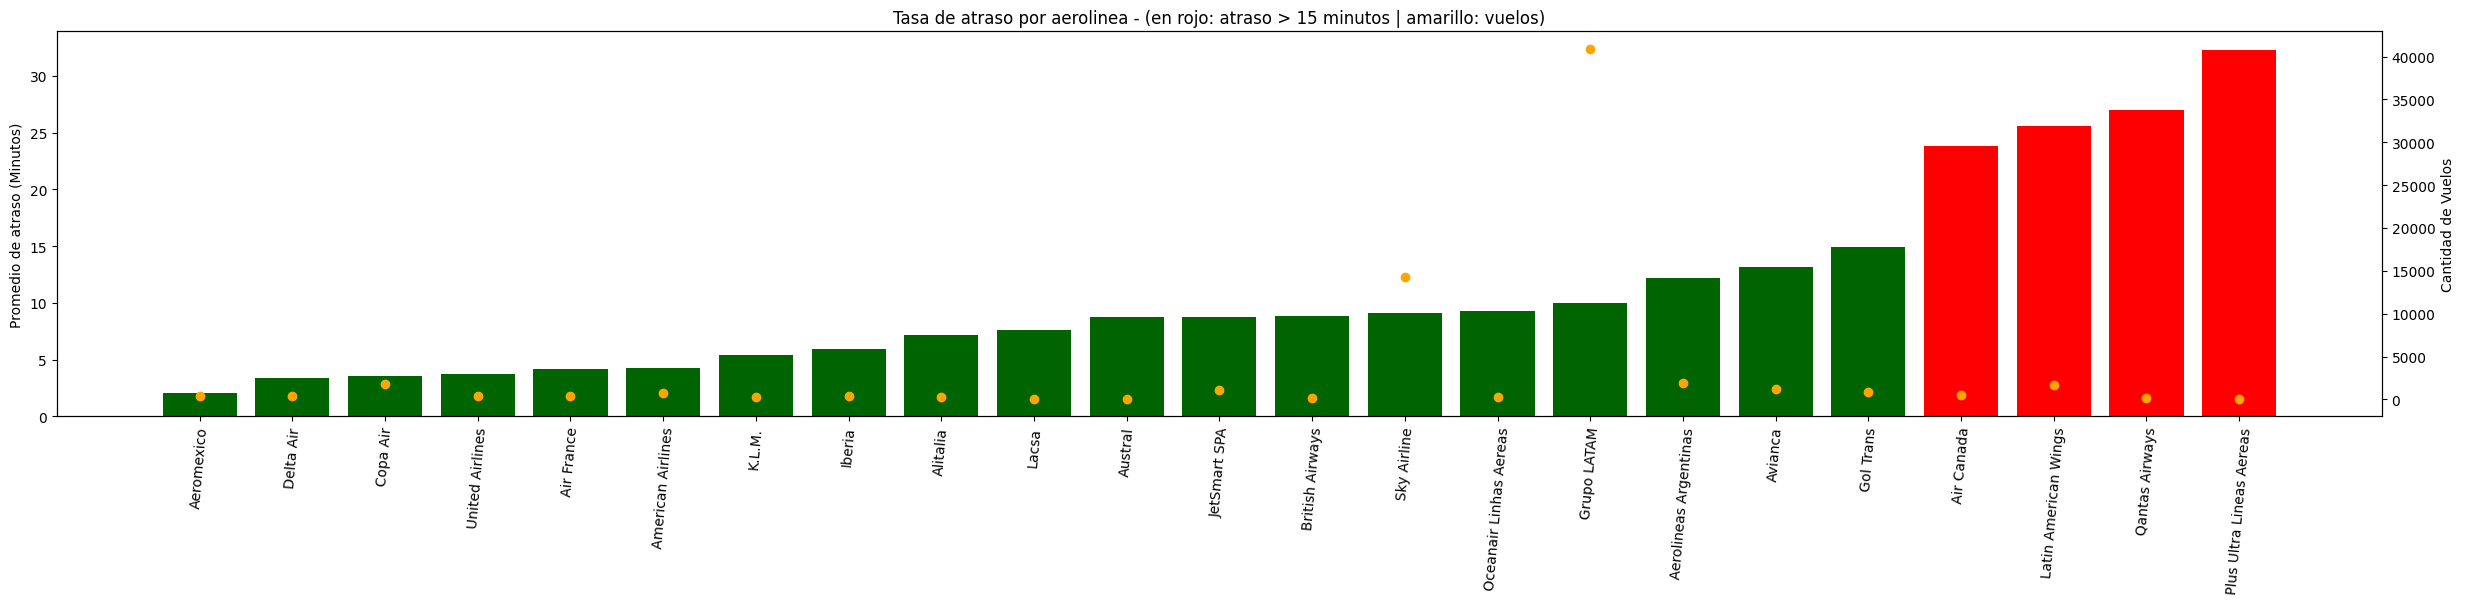

In [ ]:
grafico_tasa2(vista_aerolinea, "aerolinea")

##### Por mes del año

In [ ]:
tasa_mes = df_transform.groupby("MES")["dif_min"].mean().sort_values()
tasa_mes

MES
4      6.919920
3      7.084641
5      8.595420
2      8.615537
1      8.748035
9      9.606595
8      9.622563
6      9.632805
11    10.287500
10    12.231432
12    12.645532
7     16.045895
Name: dif_min, dtype: float64

In [ ]:
vuelos_por_mes = df_transform.groupby("MES")["MES"].count()
vista_mes = pd.merge(tasa_mes, vuelos_por_mes, left_index=True, right_index=True ).sort_values('dif_min', ascending=True)

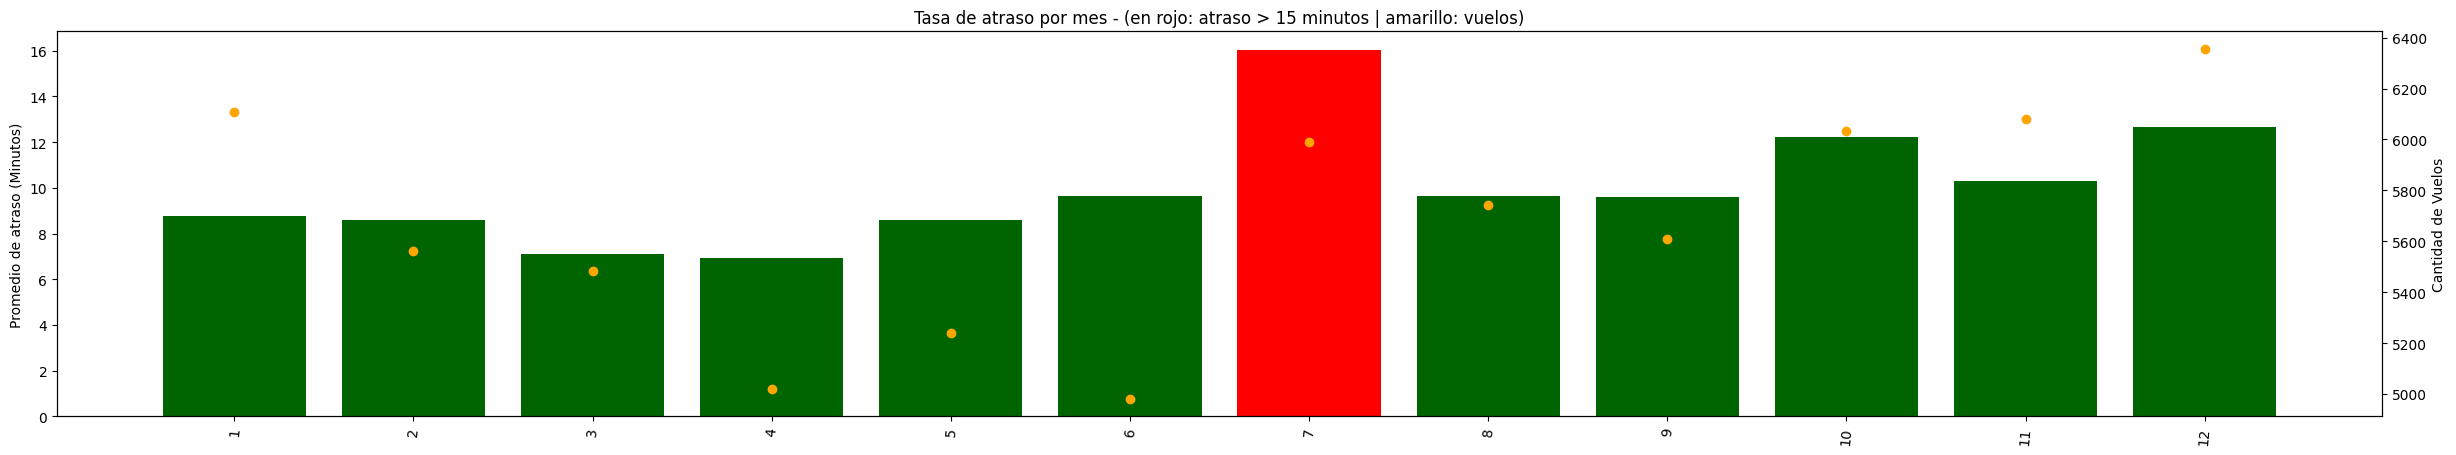

In [ ]:
grafico_tasa2(vista_mes, "mes")

##### Por dia de la semana

In [ ]:
tasa_dia = df_transform.groupby("DIANOM")["dif_min"].mean().sort_values()
tasa_dia

DIANOM
Domingo       9.017762
Martes        9.398882
Sabado        9.484914
Miercoles     9.553281
Jueves       10.449615
Lunes        10.982924
Viernes      11.691022
Name: dif_min, dtype: float64

In [ ]:
vuelos_por_dia = df_transform.groupby("DIANOM")["DIANOM"].count()
vista_dia = pd.merge(tasa_dia, vuelos_por_dia, left_index=True, right_index=True ).sort_values('dif_min', ascending=True)

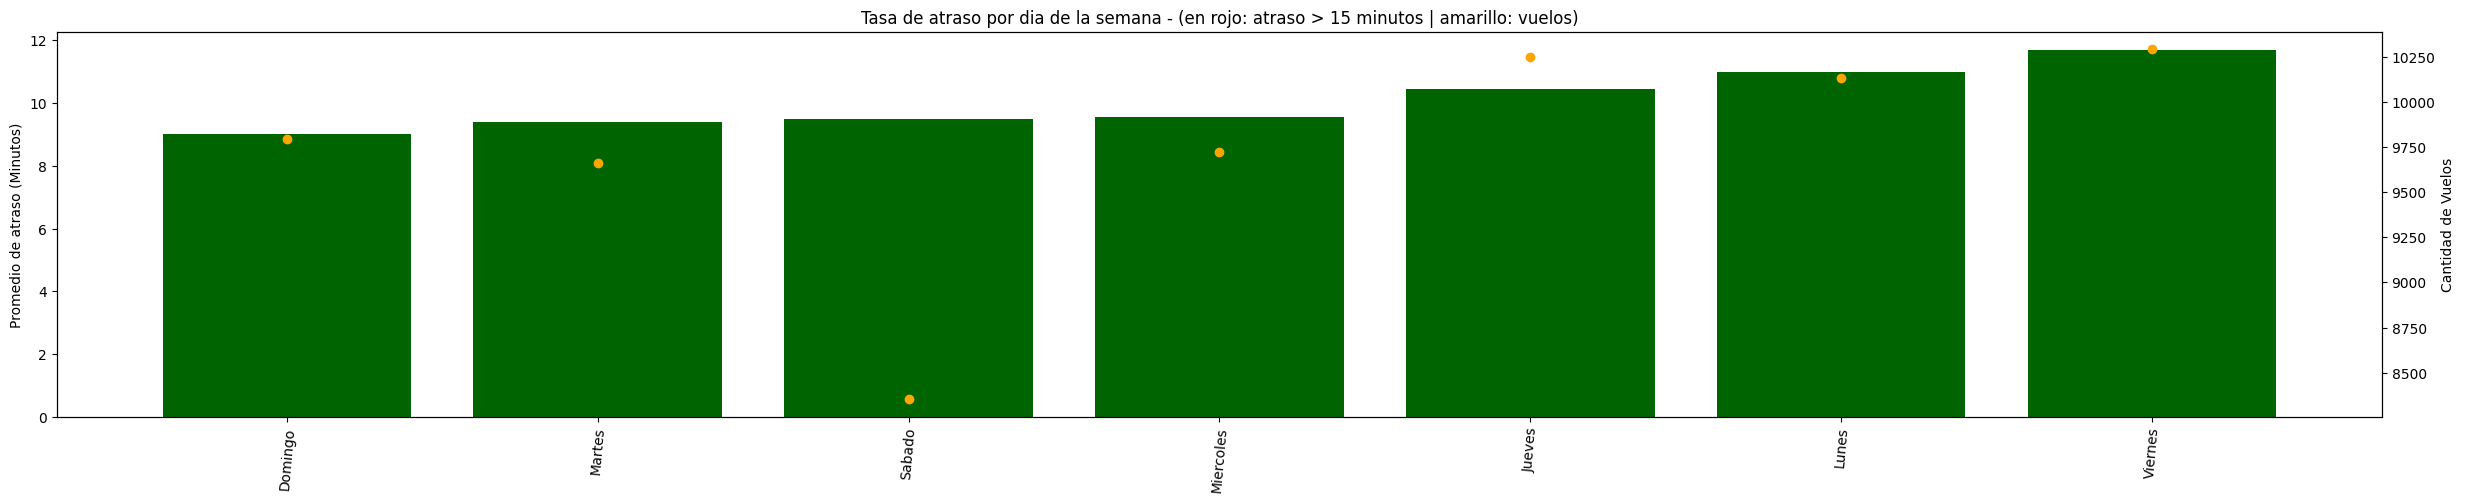

In [ ]:
grafico_tasa2(vista_dia, "dia de la semana")

##### Por temporada

In [ ]:
tasa_temporada = df_transform.groupby("temporada_alta")["dif_min"].mean().sort_values()
tasa_temporada

temporada_alta
1     8.661496
0    10.428014
Name: dif_min, dtype: float64

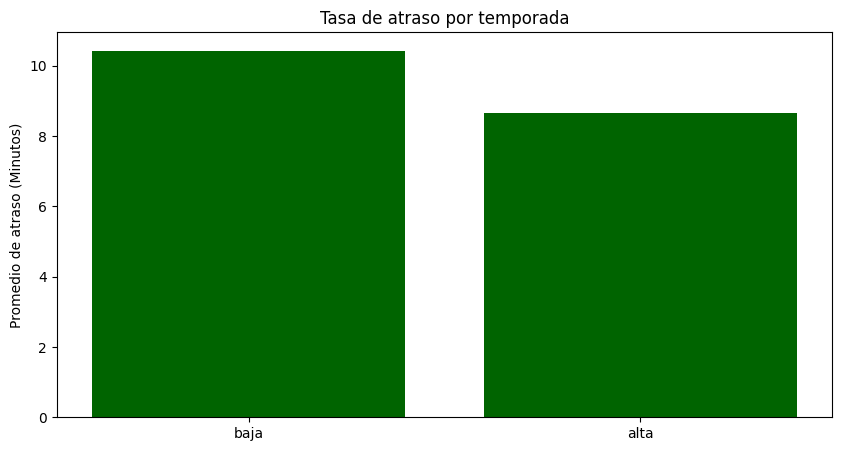

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.bar(tasa_temporada.index, tasa_temporada.values, color='darkgreen')
plt.ylabel("Promedio de atraso (Minutos)")
plt.xticks( [1, 0], ("alta", "baja"))
plt.title("Tasa de atraso por temporada");

##### Por tipo de vuelo

In [ ]:
tasa_tipo_vuelo = df_transform.groupby("TIPOVUELO")["dif_min"].mean().sort_values()
tasa_tipo_vuelo

TIPOVUELO
N     8.571769
I    11.942766
Name: dif_min, dtype: float64

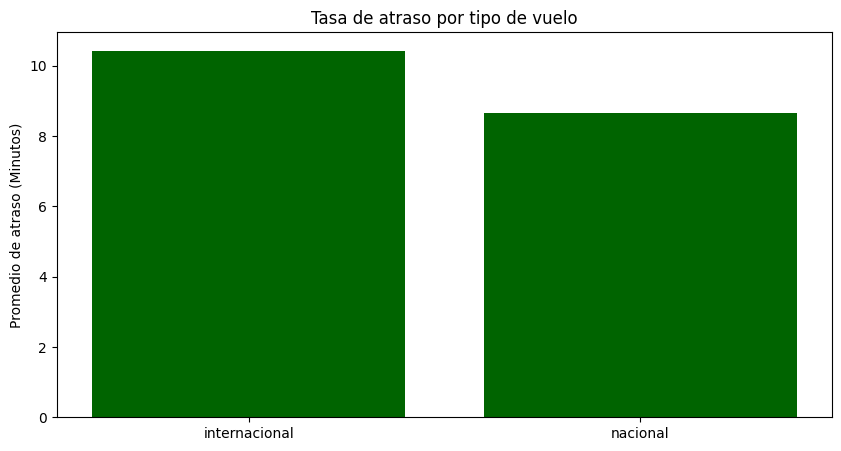

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.bar(tasa_temporada.index, tasa_temporada.values, color='darkgreen')
plt.ylabel("Promedio de atraso (Minutos)")
plt.xticks( [1, 0], ("nacional", "internacional"))
plt.title("Tasa de atraso por tipo de vuelo");

### ¿Qué variables esperarías que más influyeran en predecir atrasos?

Con respecto al promedio de minutos de atraso por variable, las variables mas significativas para predecir atrasos son:


- destino: la variabilidad es de 0 a 113 minutos de retraso
  - hay 12 ciudades de destino de un total de 62 con promedio mayor a 15, minutos de atraso. Ninguno de estos destinos reporta una cantidad de vuelos significativo.
- aerolinea: la variabilidad es de 2 a 32 minutos de retraso
  - hay 4 aerolineas de un total de 23 con promedio mayor a 15 minutos de atraso. Ninguna de estas aerolineas reporta una cantidad de vuelos significativo.
- mes: la variabilidad es de 7 a 16 minutos de retraso
  - el mes de Julio es el que presenta en promedio apenas un minuto por encima de los 15 minutos de atraso. Si existe una cantidad de vuelos significativos en este mes.

Nota: las variables que mas influyen se han determinado en función de su variabilidad y por exceso de 15 minutos de atraso promedio.

Las demas variables tienen una variabilidad mas uniforme y menor a 15 minutos de atraso

(Nota: Recordemos que le atraso implica la demora entre el horario anunciado de despegue y el horario efectivo de despegue)

## Modelos

- Si se pretende estimar la probabilidad de atraso de un vuelo mayor a 15 minutos se necesita desplegar un modelo de clasificación:
  - [0 no atraso - 1 atraso]
- Por otra parte si se necesita estimar el atraso de un vuelo debemos plantear un modelo de regresion lineal.

#### Pre-procesamiento de los datos

- Variables predictoras: Vlo-I, Des-I Emp-I, Vlo-O, Emp-O, DIA, MES, AÑO, DIANOM, TIPOVUELO, temporada_alta, dif_min, periodo_dia
- Variable objetivo: atraso_15

Validamos los valores únicos de las siguientes variables categóricas:

In [ ]:
len(df_transform['Vlo-I'].unique())

750

In [ ]:
len(df_transform['Des-I'].unique())

64

In [ ]:
len(df_transform['Emp-I'].unique())

30

In [ ]:
len(df_transform['Vlo-O'].unique())

866

In [ ]:
len(df_transform['Emp-O'].unique())

32

##### Embeddings
Para reducir el dimensionamiento de las variables anteriores se va a utilizar a embeddings

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Crear una instancia de LE
encoder = LabelEncoder()

In [ ]:
df_transform['Vlo-I'] = df_transform['Vlo-I'].astype(str) #corregimos el formato de la columna
df_transform['Vlo-O'] = df_transform['Vlo-O'].astype(str) #corregimos el formato de la columna

In [ ]:
# Embedding Vlo-I
X_encoded_Vlo_I = encoder.fit_transform(df_transform['Vlo-I'].values.reshape(-1,))  # Codificar los valores alfanuméricos
tamano_embedding = 5
matriz_Vlo_I = np.random.rand(len(encoder.classes_), tamano_embedding)
atributos_Vlo_I = matriz_Vlo_I[X_encoded_Vlo_I]   # Vectores de embeddings asociados a un valor por cada atributo

In [ ]:
# Embedding Des-I
X_encoded_Des_I = encoder.fit_transform(df_transform['Des-I'].values.reshape(-1,))  # Codificar los valores alfanuméricos
tamano_embedding = 5
matriz_Des_I = np.random.rand(len(encoder.classes_), tamano_embedding)
atributos_Des_I = matriz_Des_I[X_encoded_Des_I]   # Vectores de embeddings asociados a un valor por cada atributo

In [ ]:
# Embedding Emp-I
X_encoded_Emp_I = encoder.fit_transform(df_transform['Emp-I'].values.reshape(-1,))  # Codificar los valores alfanuméricos
tamano_embedding = 5
matriz_Emp_I = np.random.rand(len(encoder.classes_), tamano_embedding)
atributos_Emp_I = matriz_Emp_I[X_encoded_Emp_I]   # Vectores de embeddings asociados a un valor por cada atributo

In [ ]:
# Embedding Vlo-O
X_encoded_Vlo_O = encoder.fit_transform(df_transform['Vlo-O'].values.reshape(-1,))  # Codificar los valores alfanuméricos
tamano_embedding = 5
matriz_Vlo_O = np.random.rand(len(encoder.classes_), tamano_embedding)
atributos_Vlo_O = matriz_Vlo_O[X_encoded_Vlo_O]   # Vectores de embeddings asociados a un valor por cada atributo

In [ ]:
# Embedding Vlo-O
X_encoded_Emp_O = encoder.fit_transform(df_transform['Emp-O'].values.reshape(-1,))  # Codificar los valores alfanuméricos
tamano_embedding = 5
matriz_Emp_O = np.random.rand(len(encoder.classes_), tamano_embedding)
atributos_Emp_O = matriz_Emp_O[X_encoded_Emp_O]   # Vectores de embeddings asociados a un valor por cada atributo

##### Dataframe con datos de embeddings

In [ ]:
# Creamos un nuevo dataframe con todos los embeddings y las columnas útiles
df_embedding = df_transform.drop(['Fecha-I','Ori-I','Fecha-O', 'Des-O', 'OPERA',	'SIGLAORI',	'SIGLADES'], axis=1).copy()

In [ ]:
df_embedding['Vlo_I0'] = atributos_Vlo_I[:,0]
df_embedding['Vlo_I1'] = atributos_Vlo_I[:,1]
df_embedding['Vlo_I2'] = atributos_Vlo_I[:,2]
df_embedding['Vlo_I3'] = atributos_Vlo_I[:,3]
df_embedding['Vlo_I4'] = atributos_Vlo_I[:,4]

df_embedding['Des_I0'] = atributos_Des_I[:,0]
df_embedding['Des_I1'] = atributos_Des_I[:,1]
df_embedding['Des_I2'] = atributos_Des_I[:,2]
df_embedding['Des_I3'] = atributos_Des_I[:,3]
df_embedding['Des_I4'] = atributos_Des_I[:,4]

df_embedding['Emp_I0'] = atributos_Emp_I[:,0]
df_embedding['Emp_I1'] = atributos_Emp_I[:,1]
df_embedding['Emp_I2'] = atributos_Emp_I[:,2]
df_embedding['Emp_I3'] = atributos_Emp_I[:,3]
df_embedding['Emp_I4'] = atributos_Emp_I[:,4]

df_embedding['Vlo_O0'] = atributos_Vlo_O[:,0]
df_embedding['Vlo_O1'] = atributos_Vlo_O[:,1]
df_embedding['Vlo_O2'] = atributos_Vlo_O[:,2]
df_embedding['Vlo_O3'] = atributos_Vlo_O[:,3]
df_embedding['Vlo_O4'] = atributos_Vlo_O[:,4]

df_embedding['Emp_O0'] = atributos_Emp_O[:,0]
df_embedding['Emp_O1'] = atributos_Emp_O[:,1]
df_embedding['Emp_O2'] = atributos_Emp_O[:,2]
df_embedding['Emp_O3'] = atributos_Emp_O[:,3]
df_embedding['Emp_O4'] = atributos_Emp_O[:,4]

In [ ]:
df_embedding = df_embedding.drop(['Vlo-I','Des-I','Emp-I','Vlo-O','Emp-O'], axis=1)
df_embedding

,DIA,MES,AÑO,DIANOM,TIPOVUELO,temporada_alta,dif_min,atraso_15,periodo_dia,Vlo_I0,Vlo_I1,Vlo_I2,Vlo_I3,Vlo_I4,Des_I0,Des_I1,Des_I2,Des_I3,Des_I4,Emp_I0,Emp_I1,Emp_I2,Emp_I3,Emp_I4,Vlo_O0,Vlo_O1,Vlo_O2,Vlo_O3,Vlo_O4,Emp_O0,Emp_O1,Emp_O2,Emp_O3,Emp_O4
0,1,1,2017,Domingo,I,1,3.0,0,noche,0.588587,0.630074,0.265842,0.874241,0.317409,0.871288,0.114426,0.246654,0.648455,0.263747,0.721183,0.715194,0.986148,0.569357,0.747098,0.934560,0.721344,0.201844,0.006431,0.670292,0.144904,0.257150,0.223103,0.457680,0.034938
1,2,1,2017,Lunes,I,1,9.0,0,noche,0.588587,0.630074,0.265842,0.874241,0.317409,0.871288,0.114426,0.246654,0.648455,0.263747,0.721183,0.715194,0.986148,0.569357,0.747098,0.934560,0.721344,0.201844,0.006431,0.670292,0.144904,0.257150,0.223103,0.457680,0.034938
2,3,1,2017,Martes,I,1,9.0,0,noche,0.588587,0.630074,0.265842,0.874241,0.317409,0.871288,0.114426,0.246654,0.648455,0.263747,0.721183,0.715194,0.986148,0.569357,0.747098,0.934560,0.721344,0.201844,0.006431,0.670292,0.144904,0.257150,0.223103,0.457680,0.034938
3,4,1,2017,Miercoles,I,1,3.0,0,noche,0.588587,0.630074,0.265842,0.874241,0.317409,0.871288,0.114426,0.246654,0.648455,0.263747,0.721183,0.715194,0.986148,0.569357,0.747098,0.934560,0.721344,0.201844,0.006431,0.670292,0.144904,0.257150,0.223103,0.457680,0.034938
4,5,1,2017,Jueves,I,1,0.0,0,noche,0.588587,0.630074,0.265842,0.874241,0.317409,0.871288,0.114426,0.246654,0.648455,0.263747,0.721183,0.715194,0.986148,0.569357,0.747098,0.934560,0.721344,0.201844,0.006431,0.670292,0.144904,0.257150,0.223103,0.457680,0.034938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,22,12,2017,Viernes,I,0,46.0,1,tarde,0.332388,0.231192,0.861851,0.119734,0.982137,0.929755,0.187370,0.926041,0.188215,0.336411,0.481156,0.068951,0.511527,0.497133,0.126028,0.566386,0.088412,0.047878,0.543048,0.629540,0.257538,0.695897,0.828807,0.838564,0.058941
68202,25,12,2017,Lunes,I,0,16.0,1,tarde,0.332388,0.231192,0.861851,0.119734,0.982137,0.929755,0.187370,0.926041,0.188215,0.336411,0.481156,0.068951,0.511527,0.497133,0.126028,0.566386,0.088412,0.047878,0.543048,0.629540,0.257538,0.695897,0.828807,0.838564,0.058941
68203,27,12,2017,Miercoles,I,0,40.0,1,tarde,0.332388,0.231192,0.861851,0.119734,0.982137,0.929755,0.187370,0.926041,0.188215,0.336411,0.481156,0.068951,0.511527,0.497133,0.126028,0.566386,0.088412,0.047878,0.543048,0.629540,0.257538,0.695897,0.828807,0.838564,0.058941
68204,29,12,2017,Viernes,I,0,13.0,0,tarde,0.332388,0.231192,0.861851,0.119734,0.982137,0.929755,0.187370,0.926041,0.188215,0.336411,0.481156,0.068951,0.511527,0.497133,0.126028,0.566386,0.088412,0.047878,0.543048,0.629540,0.257538,0.695897,0.828807,0.838564,0.058941


##### Transformacion del resto de las variables categoricas a dummies

In [ ]:
df_embedding = pd.get_dummies(df_embedding, columns=['DIANOM', 'TIPOVUELO', 'periodo_dia'])

In [ ]:
df_embedding

,DIA,MES,AÑO,temporada_alta,dif_min,atraso_15,Vlo_I0,Vlo_I1,Vlo_I2,Vlo_I3,Vlo_I4,Des_I0,Des_I1,Des_I2,Des_I3,Des_I4,Emp_I0,Emp_I1,Emp_I2,Emp_I3,Emp_I4,Vlo_O0,Vlo_O1,Vlo_O2,Vlo_O3,Vlo_O4,Emp_O0,Emp_O1,Emp_O2,Emp_O3,Emp_O4,DIANOM_Domingo,DIANOM_Jueves,DIANOM_Lunes,DIANOM_Martes,DIANOM_Miercoles,DIANOM_Sabado,DIANOM_Viernes,TIPOVUELO_I,TIPOVUELO_N,periodo_dia_mañana,periodo_dia_noche,periodo_dia_tarde
0,1,1,2017,1,3.0,0,0.588587,0.630074,0.265842,0.874241,0.317409,0.871288,0.114426,0.246654,0.648455,0.263747,0.721183,0.715194,0.986148,0.569357,0.747098,0.934560,0.721344,0.201844,0.006431,0.670292,0.144904,0.257150,0.223103,0.457680,0.034938,1,0,0,0,0,0,0,1,0,0,1,0
1,2,1,2017,1,9.0,0,0.588587,0.630074,0.265842,0.874241,0.317409,0.871288,0.114426,0.246654,0.648455,0.263747,0.721183,0.715194,0.986148,0.569357,0.747098,0.934560,0.721344,0.201844,0.006431,0.670292,0.144904,0.257150,0.223103,0.457680,0.034938,0,0,1,0,0,0,0,1,0,0,1,0
2,3,1,2017,1,9.0,0,0.588587,0.630074,0.265842,0.874241,0.317409,0.871288,0.114426,0.246654,0.648455,0.263747,0.721183,0.715194,0.986148,0.569357,0.747098,0.934560,0.721344,0.201844,0.006431,0.670292,0.144904,0.257150,0.223103,0.457680,0.034938,0,0,0,1,0,0,0,1,0,0,1,0
3,4,1,2017,1,3.0,0,0.588587,0.630074,0.265842,0.874241,0.317409,0.871288,0.114426,0.246654,0.648455,0.263747,0.721183,0.715194,0.986148,0.569357,0.747098,0.934560,0.721344,0.201844,0.006431,0.670292,0.144904,0.257150,0.223103,0.457680,0.034938,0,0,0,0,1,0,0,1,0,0,1,0
4,5,1,2017,1,0.0,0,0.588587,0.630074,0.265842,0.874241,0.317409,0.871288,0.114426,0.246654,0.648455,0.263747,0.721183,0.715194,0.986148,0.569357,0.747098,0.934560,0.721344,0.201844,0.006431,0.670292,0.144904,0.257150,0.223103,0.457680,0.034938,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,22,12,2017,0,46.0,1,0.332388,0.231192,0.861851,0.119734,0.982137,0.929755,0.187370,0.926041,0.188215,0.336411,0.481156,0.068951,0.511527,0.497133,0.126028,0.566386,0.088412,0.047878,0.543048,0.629540,0.257538,0.695897,0.828807,0.838564,0.058941,0,0,0,0,0,0,1,1,0,0,0,1
68202,25,12,2017,0,16.0,1,0.332388,0.231192,0.861851,0.119734,0.982137,0.929755,0.187370,0.926041,0.188215,0.336411,0.481156,0.068951,0.511527,0.497133,0.126028,0.566386,0.088412,0.047878,0.543048,0.629540,0.257538,0.695897,0.828807,0.838564,0.058941,0,0,1,0,0,0,0,1,0,0,0,1
68203,27,12,2017,0,40.0,1,0.332388,0.231192,0.861851,0.119734,0.982137,0.929755,0.187370,0.926041,0.188215,0.336411,0.481156,0.068951,0.511527,0.497133,0.126028,0.566386,0.088412,0.047878,0.543048,0.629540,0.257538,0.695897,0.828807,0.838564,0.058941,0,0,0,0,1,0,0,1,0,0,0,1
68204,29,12,2017,0,13.0,0,0.332388,0.231192,0.861851,0.119734,0.982137,0.929755,0.187370,0.926041,0.188215,0.336411,0.481156,0.068951,0.511527,0.497133,0.126028,0.566386,0.088412,0.047878,0.543048,0.629540,0.257538,0.695897,0.828807,0.838564,0.058941,0,0,0,0,0,0,1,1,0,0,0,1


#### Analisis de balance de clases

In [ ]:
clases = df_embedding['atraso_15'].value_counts()
clases

0    55592
1    12614
Name: atraso_15, dtype: int64

Las clases estan desbalanceadas

#### Modelo de clasificacion: XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

In [ ]:
X = df_embedding.drop(['atraso_15'], axis=1)

In [ ]:
y = df_transform.loc[:, df_transform.columns == "atraso_15" ]

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo
model_xgb = XGBClassifier(booster='dart', learning_rate=0.1, random_state=40)

In [ ]:
# Entrenar el modelo
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=40, ...)

In [ ]:
# Estimaciones
predictions = model_xgb.predict(X_test)

##### Evaluacion

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [ ]:
# Funcion evaluadora
def matrizConfusion(modelo, nombre, y_train, y_test, y_pred_train, y_pred_test):

    accuracy_train = round(accuracy_score(y_train, y_pred_train, normalize = True),4)
    accuracy_test  = round(accuracy_score(y_test, y_pred_test, normalize = True),4)

    precision = round(precision_score(y_test, y_pred_test),4)
    recall = round(recall_score(y_test, y_pred_test),4)
    f1 = round(f1_score(y_test, y_pred_test),4)
    auc = round(roc_auc_score(y_test, modelo.predict_proba(X_test)[:,1]),4)

    text_to_print = ''
    confusion_matrix = pd.crosstab(y_test.iloc[:,0].ravel(), y_pred_test, rownames=['Real'], colnames=['Predicción'])
    group_names = ['Verd Neg','Falso Pos','Falso Neg','Verd Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in  confusion_matrix.values.reshape(-1)]
    group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix.values.reshape(-1)/np.sum(confusion_matrix.values)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    fig, axs = plt.subplots(1,2, figsize=(10,4), gridspec_kw = {'width_ratios':[1, 1]})
    txt  = axs[0]
    ax = axs[1]
    fig.suptitle(type(modelo).__name__+"-"+nombre, fontsize=14, fontweight='bold')
    txt.set_title("Datos de Evaluación")
    ax.set_title("Matriz de confusion")
    txt.axis("off")
    text_to_print = text_to_print + 'Train Accuracy = ' + str(accuracy_train) + '\n'
    text_to_print = text_to_print + 'Test  Accuracy = ' + str(accuracy_test) + '\n\n'
    text_to_print = text_to_print + 'Precision      = ' + str(precision) + '\n'
    text_to_print = text_to_print + 'Recall         = ' + str(recall) + '\n'
    text_to_print = text_to_print + 'F1 Score       = ' + str(f1) + '\n\n'
    text_to_print = text_to_print + 'AUC            = ' + str(auc) + '\n\n'
    text_to_print = text_to_print + 'Cant. Total datos Test = ' + str(np.sum(confusion_matrix.values))
    txt.text(0, 0.95, text_to_print, fontsize=14, verticalalignment='top');
    ax = sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=labels, fmt='', cmap='Blues', cbar=None, annot_kws={"size":14})
    return [type(modelo).__name__, nombre, auc, precision, recall, f1, accuracy_train, accuracy_test]

In [ ]:
# Contenedor de resultados
columns = ["Modelo", "Nombre", "AUC", "Precision", "Recall", "F1", "Accuracy Train", "Accuracy Test"]
df_result = pd.DataFrame(columns=columns)

In [ ]:
y_pred_train_xgb = model_xgb.predict(X_train)
y_pred_test_xgb = model_xgb.predict(X_test)

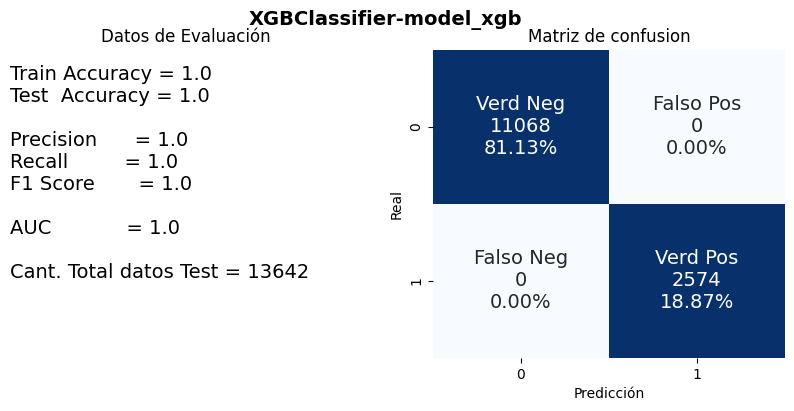

In [ ]:
df_result = pd.concat([df_result, pd.DataFrame([matrizConfusion(model_xgb, "model_xgb", y_train, y_test, y_pred_train_xgb, y_pred_test_xgb)], columns=columns)])

## Conclusiones

- 1. El modelo presenta un buen rendimiento a priori, pero podríamos estar en presencia de overfitting ya que las clases están desbalanceadas. Por lo tanto un método para resolver esto es proporcionar con datos sinteticos un balance de clases (oversampling / undersampling) y evaluar el modelo.

- 2. No se ha trabajado en fine-tuning con los hiperparámetros, se utilizaron los hiperparametros por default.

- 3. No se incluye el modelo de regresión para estimar cantidad de minutos de atraso por despegue, pero es válido tenerlo en cuenta para complementarlo.
